# The 1 in 13,983,816

# Index

- [1 Introduction](#1)
- [2 Reading the Data](#2)
- [3 Functions to Function](#3)
- [4 Oooo...The One Ticket!!](#4)
- [5 Ha! I'll buy a couple of 'em..](#5)
- [6 I'll win those other prizes..](#6)
- [7 Conclusion](#7)
- [8 Learnings](#8)
- [9 Acknowledgement](#9)

# 1

## Introduction

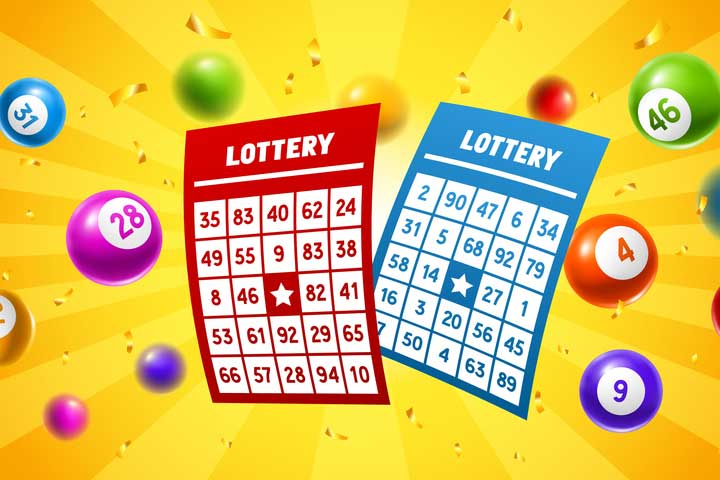
*Source*:[researchdive.com](https://www.researchdive.com/blog/lottery-the-most-popular-form-of-gambling-to-win-big-jackpot)

Gambling is risky. In a single moment you could become a millionaire or a pauper. Many are aware of its risks and tend to shy away from it. The lottery, while being another form of gambling is comparatively less riskier and more associated to fun. Moreover since many state and federal lotteries have government backing, more people are inclined to trust it more. 

However it can become an addiction especially when the stakes go up each week. Many are lured by the possibility of vast riches in a short amout of time that it leads them to spend huge amounts of money to buy lottery tickets. Many of these addicts fail to truly understand the probability of winning causing them to spend more than they can afford.

The engineers of a medical institute have tasked us with creating the logical core of a gambling prevention app that would help users better understand their odds of winning.

The goal of this project is to write code that would facilitate engineers to answer some of the following questions:
- What is the probability of winning the big prize with a single ticket?
- What is the probability of winning the big prize if we play 40 different tickets (or any other number)?
- What is the probability of having at exactly five (or four, or three, or two) winning numbers on a single ticket?

[Index](#Index)

# 2

## Reading the Data

The data for testing, provided by the institute is the historical data coming from the national [6/49 lottery game](https://en.wikipedia.org/wiki/Lotto_6/49) in Canada. The [data set](https://www.kaggle.com/datascienceai/lottery-dataset) has data for 3,665 drawings, dating from 1982 to 2018.

In [1]:
#Read the data
import pandas as pd
import random
lottery = pd.read_csv('649.csv')
lottery.head(5)

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,6/12/1982,3,11,12,14,41,43,13
1,649,2,0,6/19/1982,8,33,36,37,39,41,9
2,649,3,0,6/26/1982,1,6,23,24,27,39,34
3,649,4,0,7/3/1982,3,9,10,13,20,43,34
4,649,5,0,7/10/1982,5,14,21,31,34,47,45


In [2]:
lottery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCT          3665 non-null   int64 
 1   DRAW NUMBER      3665 non-null   int64 
 2   SEQUENCE NUMBER  3665 non-null   int64 
 3   DRAW DATE        3665 non-null   object
 4   NUMBER DRAWN 1   3665 non-null   int64 
 5   NUMBER DRAWN 2   3665 non-null   int64 
 6   NUMBER DRAWN 3   3665 non-null   int64 
 7   NUMBER DRAWN 4   3665 non-null   int64 
 8   NUMBER DRAWN 5   3665 non-null   int64 
 9   NUMBER DRAWN 6   3665 non-null   int64 
 10  BONUS NUMBER     3665 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 315.1+ KB


The dataset does not seem to have any missing data. We can now proceed with writing the core logic based on the different questions that the medical requires us to answer.

[Index](#Index)

# 3

## Functions to Function
**Writing the basic functions required to write the core logic**

Based on the questions we have been provided, two basic funtions that we will require while coding are:
- To find the factorial of a number n
- To find the combinations given a number n and the number of selections k
- To convert a list to a set

In [3]:
def factorial(n):
    """
    Calculates the factorial of a given number
    
    Args:
    n (int): Number for which factorial must be calculated
    
    Returns:
    result (int): Factorial of the given number
    """
    result = 1
    for i in range(n):
        result*=i+1
    return result

#Test the function
print(factorial(3))

6


In [4]:
def combinations(n,k):
    """
    Calculate the number of combinations of a given set
    
    Args:
    n (int): Number of objects in the set
    k (int): Number of chosen objects from the set
    
    Returns:
    (int): Number of combinations
    """
    return factorial(n)/(factorial(k)*factorial(n-k))

#Test the funtion
print(combinations(12,7))

792.0


In [5]:
def extract_numbers(list1):
    """
    Converts a list to a set
    
    Args:
    list1 (list): List to be converted to set
    
    Returns:
    (set): list of elements as a set
    """
    return set(list1)

#Test the funtion
print(extract_numbers([3, 41, 11, 12, 43, 14]))

{3, 41, 11, 12, 43, 14}


[Index](#Index)

# 4

## Oooo...The One Ticket!!
**Calculating the probability of buying the winning ticket**

One of the questions asked was what the probability was of buying the winning ticket. The way the lottery works is that six numbers are chosen from a range of 1 to 49. The winning ticket will have six of the drawn numbers (the order in which the numbers are drawn have no impact on winning). Therefore every ticket purchased has the same probability.

There is also the chance that the numbers drawn may have been previously drawn in some previous. Using the dataset we should be able to find out whether a given set of numbers were previously drawn and what the probability of winning a ticket is.

In [6]:
#Convert columns 'NUMBER DRAWN 1':'NUMBER DRAWN 6' to set
numbers_drawn = lottery.loc[:,'NUMBER DRAWN 1':'NUMBER DRAWN 6'].apply(extract_numbers,axis=1)
numbers_drawn = pd.Series(numbers_drawn)
numbers_drawn

0        {3, 41, 11, 12, 43, 14}
1        {33, 36, 37, 39, 8, 41}
2         {1, 6, 39, 23, 24, 27}
3         {3, 9, 10, 43, 13, 20}
4        {34, 5, 14, 47, 21, 31}
                  ...           
3660    {38, 40, 41, 10, 15, 23}
3661    {36, 46, 47, 19, 25, 31}
3662     {32, 34, 6, 22, 24, 31}
3663     {2, 38, 15, 49, 21, 31}
3664    {35, 37, 14, 48, 24, 31}
Length: 3665, dtype: object

Since we have converted the columns to sets, we can verify whether there are sets that have had  multiple historical occurences.

In [7]:
#Find whether the same set was drawn more than once
draw={}
for each in numbers_drawn:
    a_draw=frozenset(list(each))
    if a_draw in draw:
        draw[a_draw]+=1
    else:
        draw[a_draw]=1
max(draw.values())        

1

In [8]:
def one_ticket_probability(number_list):
    """
    Calculates the probability of having a winning ticket
    
    Args:
    number_list (list): List of numbers of the lottery ticket
    
    Returns:
    probability (float): Probability of winning based on the given numbers
    """
    probability = (1/combinations(49,6))*100
    return probability

#Test the function
number_list = [12,5,3,6,47,1]
one_ticket_probability(number_list)

7.151123842018516e-06

In [9]:
def check_historical_occurence(user_selection,winning_list):
    """
    Flags the number of times a lottery combination has historically appeared from the given set
    
    Args:
    number_list (set): List of numbers of the lottery ticket
    winning_list (series): Historical combination of numbers that have won the lottery
    
    Returns:
    boolean_check (series): Flags that indicate which lottery combination previously won
    """
    win_count=0
    boolean_check = [True if user_selection == each_ticket else False for each_ticket in winning_list]
    return pd.Series(boolean_check)

#Test the function
user_choice = {33, 36, 37, 39, 8, 41}
win_count = check_historical_occurence(user_choice,numbers_drawn).sum()
win_count

1

Now that we have functions to check the probability of a given set of numbers and the number of historical occurences the set has had. We can proceed to test both functions simulataneously.

In [10]:
def win_chances(user_choice):
    death_options=['cold','lightining','fireworks','space accident']
    win_count = check_historical_occurence(user_choice,numbers_drawn).sum()
    frequency = {1:'once',2:'twice',3:'thrice'}
    if win_count > 0:
        print('The probability of winning the big price with the set {userset} is {prob:.7f}%\nThis combination of numbers have been drawn {won_count} before.'.format(userset=user_choice,prob=one_ticket_probability(user_choice),won_count=frequency[win_count]))
    else:
        print('The probability of winning the big price with the set {userset} is: {prob:.7f}%\n'.format(userset=user_choice,prob=one_ticket_probability(user_choice)))
    print('With those odds you are more likely to be killed by {}.'.format(death_options[random.randint(0,3)]))

In [11]:
user_choice = {33, 6, 7, 39, 8, 41}
win_chances(user_choice)

The probability of winning the big price with the set {33, 6, 39, 8, 7, 41} is: 0.0000072%

With those odds you are more likely to be killed by space accident.


In [12]:
user_choice = {11, 6, 7, 50, 8, 41}
win_chances(user_choice)

The probability of winning the big price with the set {6, 7, 8, 41, 11, 50} is: 0.0000072%

With those odds you are more likely to be killed by fireworks.


In [13]:
user_choice = {41, 61, 7, 70, 8, 81}
win_chances(user_choice)

The probability of winning the big price with the set {70, 7, 8, 41, 81, 61} is: 0.0000072%

With those odds you are more likely to be killed by fireworks.


In [14]:
import random
user_choice = {33, 6, 7, 39, 8, 41}
death_options=['cold','lightining','fireworks','space accident']
win_count = check_historical_occurence(user_choice,numbers_drawn).sum()
frequency = {1:'once',2:'twice',3:'thrice'}
if win_count > 0:
    print('The probability of winning the big price with the set {userset} is {prob:.7f}%\nThis combination of numbers have been drawn {won_count} before.'.format(userset=user_choice,prob=one_ticket_probability(user_choice),won_count=frequency[win_count]))
else:
    print('The probability of winning the big price with the set {userset} is: {prob:.7f}%\n'.format(userset=user_choice,prob=one_ticket_probability(user_choice)))
print('With those odds you are more likely to be killed by {}.'.format(death_options[random.randint(0,3)]))

The probability of winning the big price with the set {33, 6, 39, 8, 7, 41} is: 0.0000072%

With those odds you are more likely to be killed by cold.


In addition to providing the details that the user will require about the probabilities of winning an additional line of what other probability has been give. Like the probability of dying by fireworks or a space accident. 

These probabilities have been calculated and taken from [here](https://www.floridamuseum.ufl.edu/shark-attacks/odds/compare-risk/death/) and while it is not applicable to everyone, it should playfully encourage addicts to not engage their addiction (of buying a lottery ticket).

[Index](#Index)

# 5

## Ha! I'll buy a couple of 'em..
**Calculating the probability of winning after buying multiple tickets**

Certain addicts may not be convinced by the probabilities of a single ticket. When presented with such a probability they are likely to argue that they buy multiple tickets which would increase their probability of winning the lottery.

We shall write a function to calculate those probabilities.

In [15]:
def multi_ticket_probability(n):
    """
    Calculates the probability of buying more than one ticket
    
    Args:
    n (int): Number of tickets being purchased
    
    Returns:
    (float): Probability of winning after buying the specified number of tickets
    """
    total_combinations = combinations(49,6)
    number_of_tickets = n
    return (number_of_tickets/total_combinations) * 100
list1 = [1, 10, 100, 10000, 1000000, 6991908, 13983816]
list2 = []

for each_n in list1:
    print('The probability of winning after buying {num_tickets} ticket/s is {prob:.7f}%'.format(num_tickets=each_n,prob=multi_ticket_probability(each_n)))

The probability of winning after buying 1 ticket/s is 0.0000072%
The probability of winning after buying 10 ticket/s is 0.0000715%
The probability of winning after buying 100 ticket/s is 0.0007151%
The probability of winning after buying 10000 ticket/s is 0.0715112%
The probability of winning after buying 1000000 ticket/s is 7.1511238%
The probability of winning after buying 6991908 ticket/s is 50.0000000%
The probability of winning after buying 13983816 ticket/s is 100.0000000%


Using these probabilities are likely to convince addicts to think twice about buying lottery tickets. However there are certain addicts who are still unlikely to be convinced due to the other prizes offered by the lottery. We shall discuss this in more detail.

[Index](#Index)

# 6

## I'll win those other prizes..
**Calculating the probability of winning the other prizes**

The 649 lottery has other prizes. A lottery participant is likely to lose the big prize only if all 6 numbers do not match. The lottery does offer prizes if the participants have 5,4,3 or 2 of the drawn numbers albeit with lower prize values.

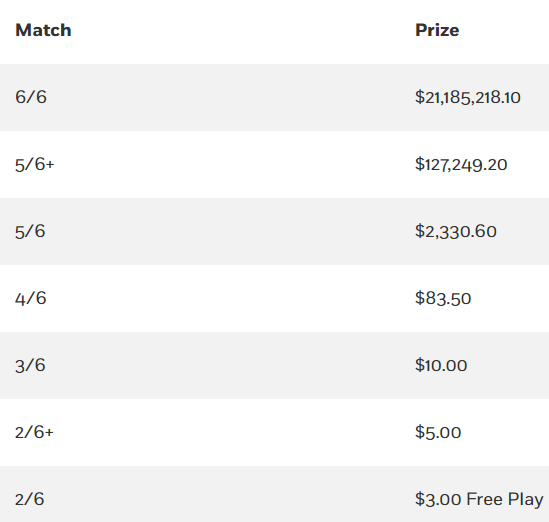

This is more likely to entice addicts because they are likely to feel that they are not losing as long as there is a chance of winning something.

We shall write a function to calculate the probability of winning prizes when exactly 5, 4, 3 and 2 of 6 numbers drawn are exactly the same as that held by the lottery participant respectively.

In [16]:
def probability_less6(n):
    """
    Calculate the probability of winning based on certain number of the selected numbers being drawn
    
    Args:
    n (int): The number of user selections that have been drawn
    
    Returns:
    probability (float): Probability of winning based on the number of the user selected numbers drawn
    """
    num_of_successful_outcomes = combinations(6,n)*combinations(43,6-n)
    total_outcomes = combinations(49,6)
    probability = (num_of_successful_outcomes/total_outcomes)*100
    return probability

In [17]:
for i in range(5,1,-1):
    print('The probability of winning with exactly {number} numbers is {prob:.7f}%'.format(number=i,prob=probability_less6(i))) 

The probability of winning with exactly 5 numbers is 0.0018450%
The probability of winning with exactly 4 numbers is 0.0968620%
The probability of winning with exactly 3 numbers is 1.7650404%
The probability of winning with exactly 2 numbers is 13.2378029%


These probabilities, hopefully have more impact on a lottery addict to convince them of withdrawing from the habit of buying lottery tickets. It is clear from the above results that the probabilities as we go closer to the big price are significantly reduced. 

The last price is one which keeps the habit going. It encourages the user to keep playing the lottery.

[Index](#Index)

# 7 

## App Ideation

Seeing as we were able to create functions and test their outputs, it would be helpful to the engineers to understand how we expect our output to be used in their app. Using wireframes we can generate UIs that could provide the context necessary to use our logic.

A de-addiction app should help in intervening when the user is able to take up the harmful habit. With this in mind the app we built will allow the user to indulge in his/her behavior but with some intervention from the app.

The app is focused on users who are genuinely interested in de-addiction and need an intervention when they indulge in their behavior.

The app we build should allow the user to select the numbers that they want to play and process the payment for the same. However, the app will intervene between when the user selects his numbers and proceed to pay for the lottery.

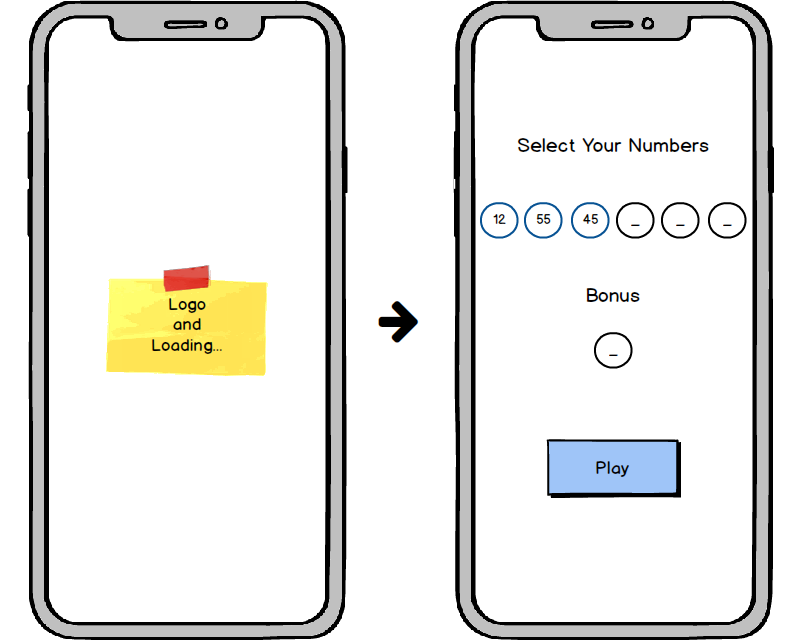

The logo would load and allow the user to select the number combination for the lotto.

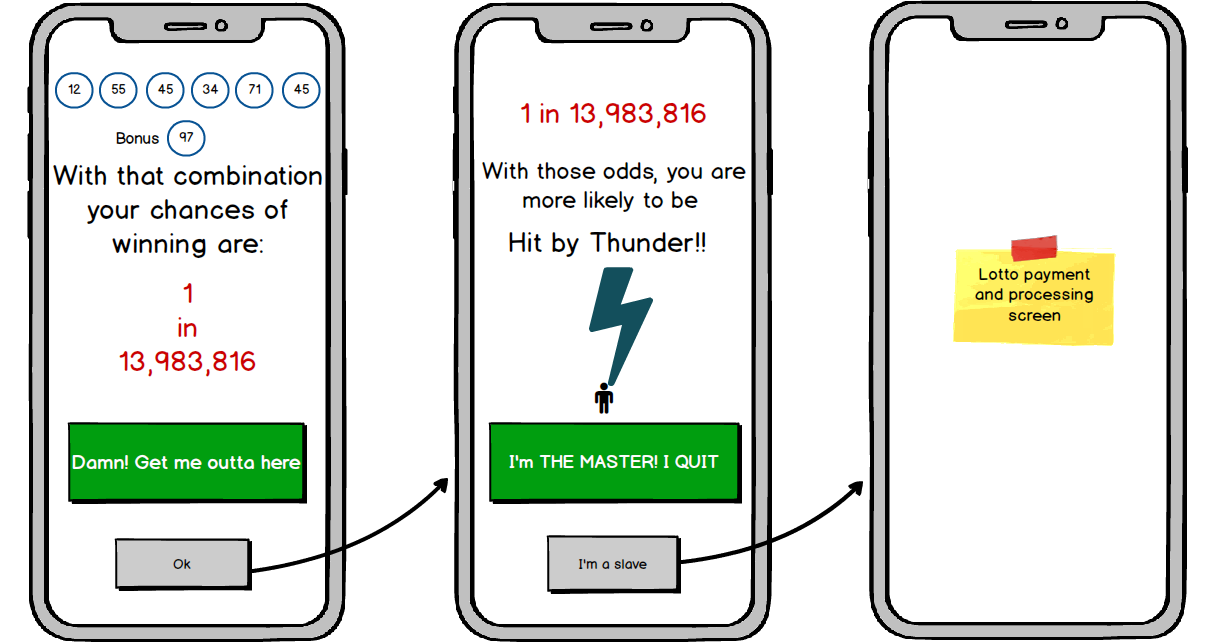

Once the user has provided the detail, the intervention will kick in. Everytime the user disregards the probabilities and moves on, the app would provide a different more likely scenario such as space accident or death by cold. If the user still disregards those messages, the app will proceed to process the payment for the lottery.

# 8

## Conclusion

In this project we were tasked with providing the core logic to medical institute whose aim it is to prevent lottery addicts from engaging in their addiction. We used the 649 lottery data to test our logic and through the process learned about the devious nature of the lottery.

The chances of winning the big price, as we learnt is 1 in 13,983,816. The value of smaller prizes seem to have their value go down as equality of the drawn numbers decrease. We also learnt that these probabilities do not improve as more tickets are bought.			

[Index](#Index)

# 8

## Learnings

[Using frozen set as a dict key](https://stackoverflow.com/questions/28566797/is-it-safe-to-use-frozen-set-as-dict-key)

[Index](#Index)

# 9

## Acknowledgement

- The focus of this project was to understand the concept of permutation and combination and apply the same in a fictitious scenario for the purpose of learning.
- This is a guided project from [Dataquest](https://www.dataquest.io/).

[Index](#Index)